In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
blood = pd.read_csv('./blood_pressure.csv')
blood['diet'] = blood['diet'].replace({'0': 'no'})
blood = blood[blood['height'] != 0]
blood = blood[blood['blood_pressure'] != 0]
blood['age_height'] = np.log((blood['age']*blood['height']))
blood['age'] = np.log((blood['age']))
blood['food_agregate'] = (blood['water']*blood['carbs']*blood['fiber']*blood['protien']*blood['sugar'])
blood['drugs'] = (blood['marijuana_use']*blood['cocaine_uses'])
blood['substances'] = (blood['fats']*blood['cholesterol']*blood['alchohol']*blood['caffeine'])
blood[:10].T
blood[:10].T

,0,1,2,3,4,5,6,7,8,9
SEQN,93711.0,93716.0,93717.0,93721.0,93723.0,93726.0,93728.0,93738.0,93743.0,93746.0
blood_pressure,68.0,72.0,62.0,68.0,72.0,52.0,74.0,82.0,86.0,64.0
weight,62.1,77.7,74.4,85.1,64.9,74.3,118.1,97.7,79.3,62.1
height,170.6,159.2,174.1,154.0,170.1,154.5,188.1,170.2,187.8,158.4
bmi,21.3,30.7,24.5,35.9,22.4,31.1,33.4,33.7,22.5,24.8
salt_type,ordinary,ordinary,ordinary,no_extra_salt,ordinary,ordinary,ordinary,salt_substitute,ordinary,ordinary
diet,yes,no,no,no,no,no,no,yes,no,no
protien,101.33,103.91,97.12,79.98,41.62,81.89,80.0,116.36,175.55,80.67
carbs,339.6,442.98,345.52,226.61,269.6,184.99,213.19,50.95,684.76,222.26
sugar,148.21,133.24,137.01,105.06,147.49,72.17,95.17,11.92,170.03,86.64


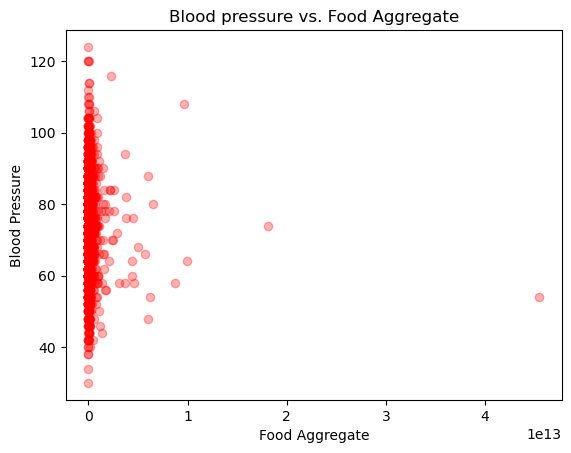

In [3]:
y = blood['blood_pressure'].values
x = blood['food_agregate'].values
# x = blood['water'].values
# x = blood['carbs'].values
# x = blood['sugar'].values
# x = blood['protien'].values
#x = blood['fiber'].values

plt.scatter(x, y, alpha = 0.3, color = 'red')
plt.title('Blood pressure vs. Food Aggregate')
plt.xlabel("Food Aggregate")
plt.xlim()
plt.ylabel("Blood Pressure")
plt.show()

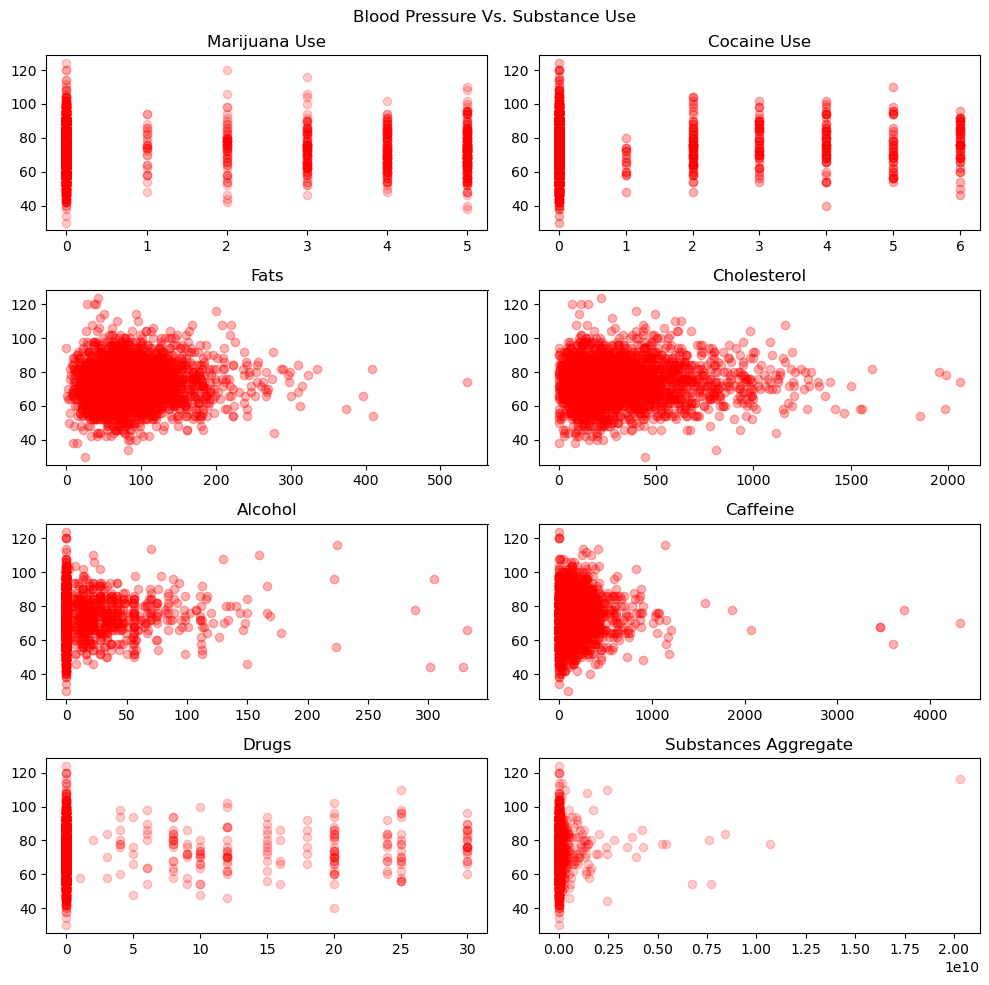

In [19]:
y = blood['blood_pressure'].values
x_1 = blood['marijuana_use'].values
x_2 = blood['cocaine_uses'].values
x_3 = blood['fats'].values
x_4 = blood['cholesterol'].values
x_5 = blood['alchohol'].values
x_6 = blood['caffeine'].values
x_7 = blood['drugs'].values
x_8 = blood['substances'].values

#Plots for relationship between predictors and response variables
fig, ax = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Blood Pressure Vs. Substance Use')
ax[0, 0].scatter(x_1, y, alpha = 0.2, color = 'red')
ax[0, 0].set_title('Marijuana Use')
ax[0, 1].scatter(x_2, y, alpha = 0.3, color = 'red')
ax[0, 1].set_title('Cocaine Use')
ax[1, 0].scatter(x_3, y, alpha = 0.3, color = 'red')
ax[1, 0].set_title('Fats')
ax[1, 1].scatter(x_4, y, alpha = 0.3, color = 'red')
ax[1, 1].set_title('Cholesterol')
ax[2, 0].scatter(x_5, y, alpha = 0.3, color = 'red')
ax[2, 0].set_title('Alcohol')
ax[2, 1].scatter(x_6, y, alpha = 0.3, color = 'red')
ax[2, 1].set_title('Caffeine')
ax[3, 0].scatter(x_7, y, alpha = 0.2, color = 'red')
ax[3, 0].set_title('Drugs')
ax[3, 1].scatter(x_8, y, alpha = 0.2, color = 'red')
ax[3, 1].set_title('Substances Aggregate')
fig.tight_layout()
plt.show()

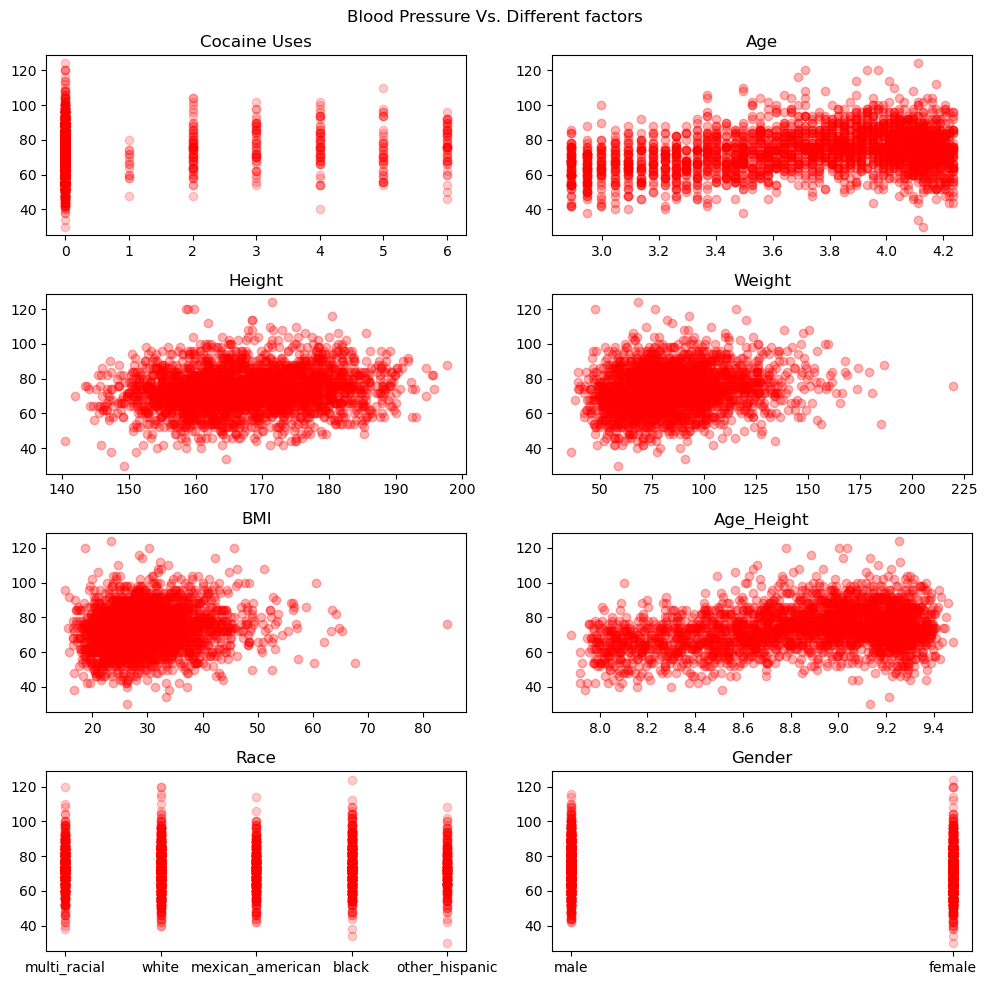

In [20]:
y = blood['blood_pressure'].values
y_2 = np.log(y)

#X values for possible predictors
x_1 = blood['cocaine_uses'].values
x_2 = blood['age'].values
x_3 = blood['height'].values
x_4 = blood['weight'].values
x_5 = blood['bmi'].values
x_6 = blood['age_height'].values
x_7 = blood['race'].values
x_8 = blood['gender'].values

#Plots for relationship between predictors and response variables
fig, ax = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Blood Pressure Vs. Different factors')
ax[0, 0].scatter(x_1, y, alpha = 0.2, color = 'red')
ax[0, 0].set_title('Cocaine Uses')
ax[0, 1].scatter(x_2, y, alpha = 0.3, color = 'red')
ax[0, 1].set_title('Age')
ax[1, 0].scatter(x_3, y, alpha = 0.3, color = 'red')
ax[1, 0].set_title('Height')
ax[1, 1].scatter(x_4, y, alpha = 0.3, color = 'red')
ax[1, 1].set_title('Weight')
ax[2, 0].scatter(x_5, y, alpha = 0.3, color = 'red')
ax[2, 0].set_title('BMI')
ax[2, 1].scatter(x_6, y, alpha = 0.3, color = 'red')
ax[2, 1].set_title('Age_Height')
ax[3, 0].scatter(x_7, y, alpha = 0.2, color = 'red')
ax[3, 0].set_title('Race')
ax[3, 1].scatter(x_8, y, alpha = 0.2, color = 'red')
ax[3, 1].set_title('Gender')
fig.tight_layout()
plt.show()

In [4]:
blood2 = blood[['blood_pressure','age_height', 'cocaine_uses', 'gender' ,'race']].copy()

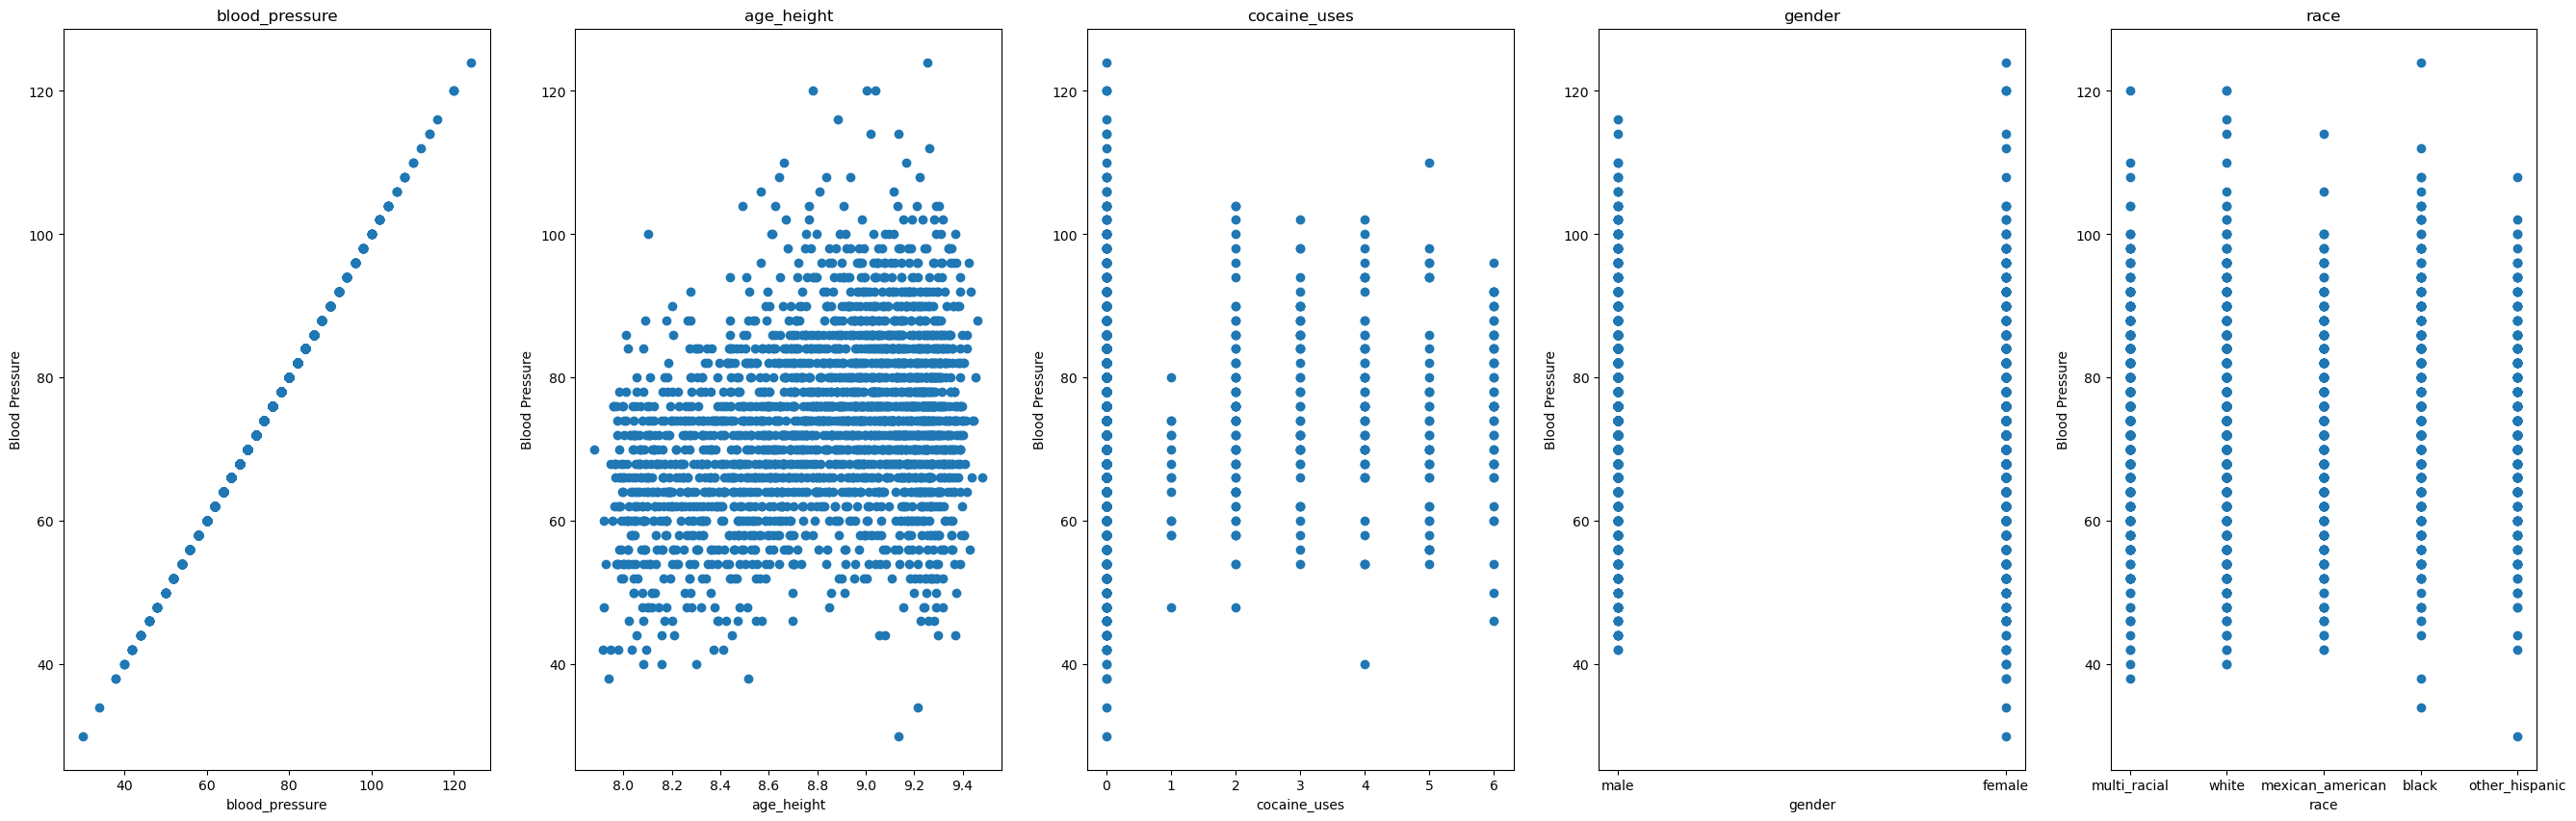

In [5]:
# age same has problem
plt.figure(figsize=(40, 10))


# i: index
for i, col in enumerate(blood2.columns):
    plt.subplot(1, 6, i+1)
    x = blood2[col]
    y = blood2['blood_pressure']
    plt.plot(x, y, 'o')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Blood Pressure')

Without performing a logarithmic transformation on the dependent variable the model suffers from heterskedasticity.

In [6]:
m1 = smf.ols('blood_pressure ~ age + height + bmi + alchohol + marijuana_use + min_vig_rec + C(race) + C(gender)', blood).fit()
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m1.summary()

{'LM Statistic': 40.17295074187727, 'LM-Test p-value': 3.3418429181190076e-05}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     37.15
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           8.52e-75
Time:                        14:18:33   Log-Likelihood:                -10077.
No. Observations:                2642   AIC:                         2.018e+04
Df Residuals:                    2630   BIC:                         2.025e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       9.7377      5.956      1.635      0.102      -1.940      21.416
C(race)[T.mexican_american]    -0.4769      0.751     -0.635      0.526      -1.950       0.996
C(race)[T.multi_racial]         1.2544      0.694      1.808      0.071      -0.106       2.615
C(race)[T.other_hispanic]      -0.9659      0.861     -1.122      0.262      -2.654       0.722
C(race)[T.white]               -0.7945      0.597     -1.332      0.183      -1.965       0.375
C(gender)[T.male]               1.5693      0.613      2.560      0.011       0.367       2.772
age                             8.8693      0.595     14.905      0.000       7.702      10.036
height                          0.1483      0.032      4.582      0.000       0.085       0.212
bmi                             0.1701      0.030      5.629      0.000       0.111       0.229
alchohol                        0.0056      0.008      0.677      0.498      -0.011       0.022
marijuana_use                   0.0503      0.143      0.352      0.725      -0.230       0.331
min_vig_rec                    -0.0023      0.005     -0.450      0.653      -0.012       0.008
==============================================================================
Omnibus:                       43.859   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.501
Skew:                           0.121   Prob(JB):                     6.64e-17
Kurtosis:                       3.786   Cond. No.                     4.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Free of heteroskedasticity :)

In [7]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + bmi + cocaine_uses + C(gender) + C(race)', blood).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 3.1570075495315177, 'LM-Test p-value': 0.9241213396840902}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.136
Model:                                OLS   Adj. R-squared:                  0.134
Method:                     Least Squares   F-statistic:                     51.90
Date:                    Thu, 12 Oct 2023   Prob (F-statistic):           1.88e-78
Time:                            14:18:33   Log-Likelihood:                 1199.5
No. Observations:                    2642   AIC:                            -2381.
Df Residuals:                        2633   BIC:                            -2328.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.0754      0.069     44.565      0.000       2.940       3.211
C(gender)[T.male]               0.0376      0.006      6.182      0.000       0.026       0.050
C(race)[T.mexican_american]    -0.0139      0.010     -1.372      0.170      -0.034       0.006
C(race)[T.multi_racial]         0.0128      0.009      1.352      0.177      -0.006       0.031
C(race)[T.other_hispanic]      -0.0198      0.012     -1.684      0.092      -0.043       0.003
C(race)[T.white]               -0.0118      0.008     -1.413      0.158      -0.028       0.005
age_height                      0.1266      0.008     16.275      0.000       0.111       0.142
bmi                             0.0023      0.000      5.563      0.000       0.002       0.003
cocaine_uses                    0.0081      0.002      3.242      0.001       0.003       0.013
==============================================================================
Omnibus:                      181.454   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.499
Skew:                          -0.531   Prob(JB):                     6.81e-65
Kurtosis:                       4.248   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

{'LM Statistic': 40.17295074187727, 'LM-Test p-value': 3.3418429181190076e-05}


Text(0.5, 1.0, 'Moldel 1. Fitted Values vs. Residuals')

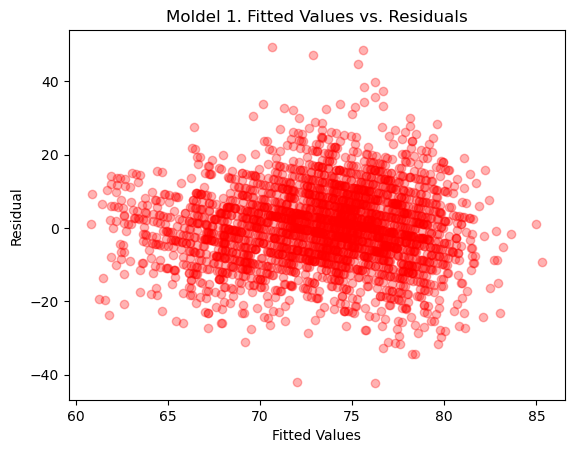

In [8]:
# MODEL 1
# Heteroscedasticity tests
# Fitted Values vs. Residuals Plot
p = m1.fittedvalues
res = m1.resid
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
plt.scatter(p,res,  color='red', alpha=0.3)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Moldel 1. Fitted Values vs. Residuals")
#looks bad
#the observations around y=0 is causing a lot of variaty in this data

{'LM Statistic': 3.1570075495315177, 'LM-Test p-value': 0.9241213396840902}


Text(0.5, 1.0, 'Model 2. Fitted Values vs. Residuals')

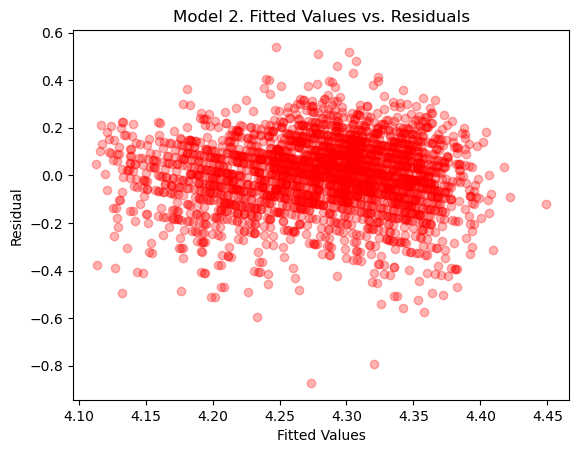

In [9]:
# MODEL 2
# Heteroscedasticity tests
# Fitted Values vs. Residuals Plot
p = m2.fittedvalues
res = m2.resid
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
plt.scatter(p,res,  color='red', alpha=0.3)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Model 2. Fitted Values vs. Residuals")

In [10]:
sm.stats.anova_lm(m2, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),0.905625,1.0,38.221376,7.297579e-10
C(race),0.304852,4.0,3.216528,1.208645e-02
age_height,6.276018,1.0,264.875673,8.037767e-57
bmi,0.733145,1.0,30.941959,2.926388e-08
cocaine_uses,0.249028,1.0,10.510067,1.202073e-03
Residual,62.386836,2633.0,NaN,NaN


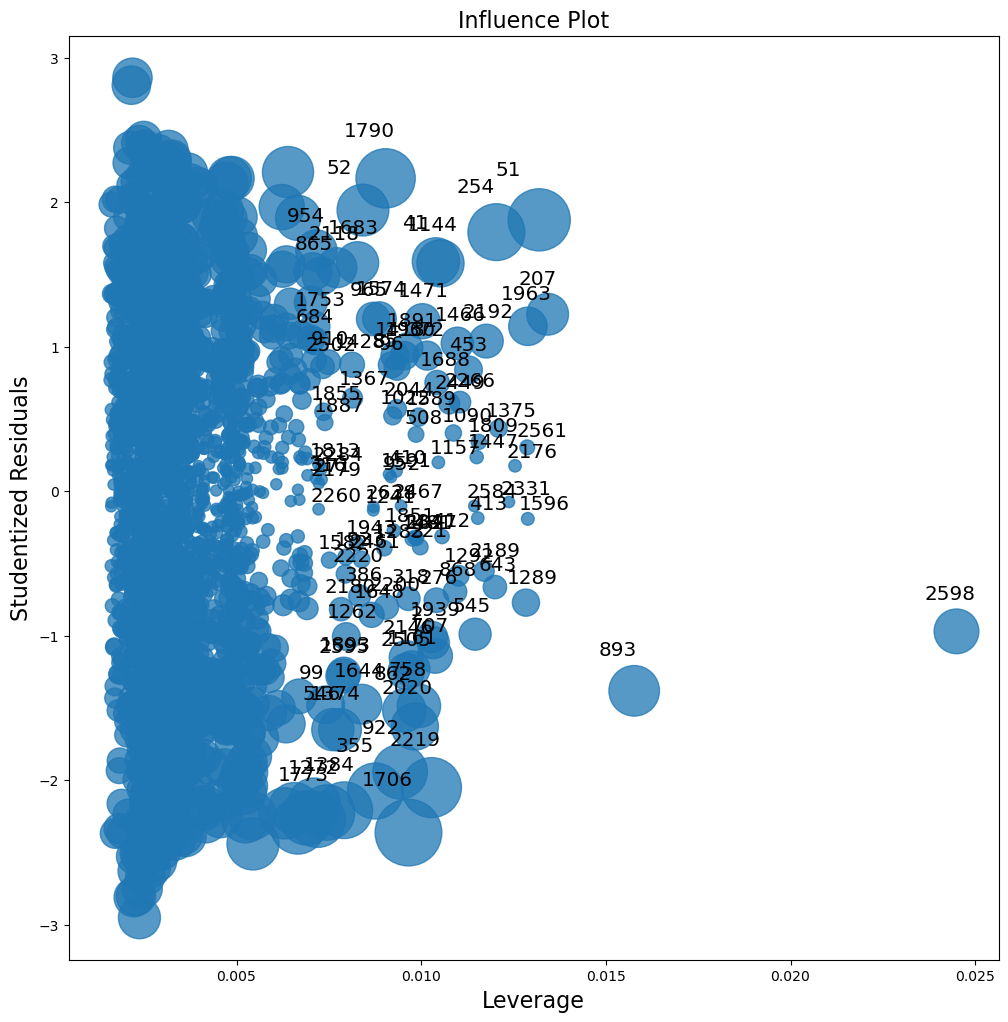

In [23]:
# Inluential points
infl = m2.get_influence()
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(m2,ax=ax, criterion="cooks", alpha = 0) 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

In [12]:
#threshold externally studentized residuals
import scipy
n=2642
p=8
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?
len(blood.index[atyp_stud])

142

In [13]:
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n

In [14]:
intersection = set(blood.index[atyp_cook]) & set(blood.index[atyp_stud])
# drop influential points
df_dropped = blood.drop(list(intersection))
df_dropped

,SEQN,blood_pressure,weight,height,bmi,salt_type,diet,protien,carbs,sugar,...,marijuana_use,cocaine_uses,min_vig_work,min_vig_rec,doc_diabetes,risk_diabetes,age_height,food_agregate,drugs,substances
0,93711.0,68.0,62.1,170.6,21.3,ordinary,yes,101.33,339.60,148.21,...,0.0,0.0,0.0,60.0,2.0,2.0,9.164673,4.316719e+11,0.0,0.000000e+00
1,93716.0,72.0,77.7,159.2,30.7,ordinary,no,103.91,442.98,133.24,...,0.0,0.0,0.0,180.0,2.0,2.0,9.181035,1.068806e+11,0.0,0.000000e+00
2,93717.0,62.0,74.4,174.1,24.5,ordinary,no,97.12,345.52,137.01,...,4.0,6.0,0.0,0.0,2.0,2.0,8.250672,4.841306e+10,24.0,0.000000e+00
3,93721.0,68.0,85.1,154.0,35.9,no_extra_salt,no,79.98,226.61,105.06,...,0.0,0.0,0.0,0.0,2.0,2.0,9.131297,2.036987e+10,0.0,0.000000e+00
4,93723.0,72.0,64.9,170.1,22.4,ordinary,no,41.62,269.60,147.49,...,0.0,0.0,60.0,60.0,3.0,1.0,9.295270,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,102920.0,94.0,73.0,159.6,28.7,ordinary,no,60.51,277.11,83.04,...,0.0,0.0,0.0,0.0,2.0,2.0,9.199805,2.103734e+10,0.0,6.609583e+08
2649,102929.0,82.0,116.7,183.0,34.8,ordinary,no,73.89,177.01,25.82,...,0.0,0.0,0.0,0.0,2.0,2.0,9.303831,1.229300e+10,0.0,0.000000e+00
2650,102933.0,62.0,50.8,167.9,18.0,ordinary,no,70.14,393.95,157.55,...,0.0,0.0,0.0,45.0,2.0,2.0,8.301422,0.000000e+00,0.0,0.000000e+00
2652,102949.0,72.0,76.9,180.1,23.7,ordinary,no,263.12,368.84,183.58,...,3.0,3.0,90.0,0.0,2.0,2.0,8.690020,2.843480e+11,9.0,9.232698e+08


Dropping influential points increases R^2 and still no heterskedasticity

In [15]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + bmi + cocaine_uses + C(gender) + C(race)', df_dropped).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 5.78521115972867, 'LM-Test p-value': 0.6712770389648071}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.173
Model:                                OLS   Adj. R-squared:                  0.170
Method:                     Least Squares   F-statistic:                     65.99
Date:                    Thu, 12 Oct 2023   Prob (F-statistic):           1.41e-98
Time:                            14:18:39   Log-Likelihood:                 1567.7
No. Observations:                    2534   AIC:                            -3117.
Df Residuals:                        2525   BIC:                            -3065.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1146      0.060     51.677      0.000       2.996       3.233
C(gender)[T.male]               0.0394      0.005      7.477      0.000       0.029       0.050
C(race)[T.mexican_american]    -0.0089      0.009     -1.013      0.311      -0.026       0.008
C(race)[T.multi_racial]         0.0160      0.008      1.950      0.051   -9.19e-05       0.032
C(race)[T.other_hispanic]      -0.0177      0.010     -1.737      0.082      -0.038       0.002
C(race)[T.white]               -0.0119      0.007     -1.642      0.101      -0.026       0.002
age_height                      0.1230      0.007     18.110      0.000       0.110       0.136
bmi                             0.0024      0.000      6.366      0.000       0.002       0.003
cocaine_uses                    0.0081      0.002      3.734      0.000       0.004       0.012
==============================================================================
Omnibus:                       22.719   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.010
Skew:                          -0.164   Prob(JB):                     4.52e-05
Kurtosis:                       2.714   Cond. No.                         742.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

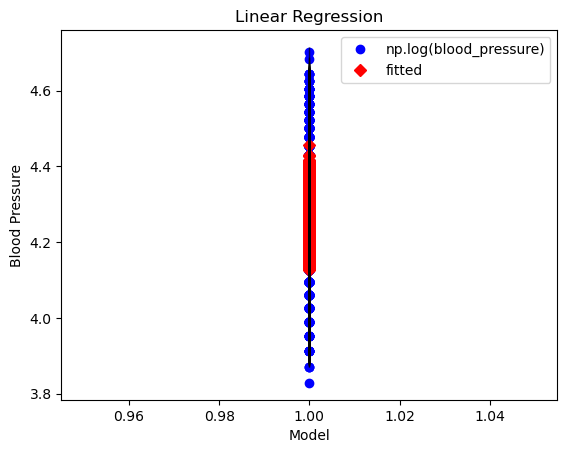

In [29]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(m2, 0, ax=ax)
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Model")
ax.set_title("Linear Regression")


In [16]:
from scipy.stats import kstest
kstest(m2.resid,'norm')

KstestResult(statistic=0.38064888800079943, pvalue=0.0, statistic_location=0.2872433029508814, statistic_sign=1)

(array([ 23.,  99., 196., 343., 525., 576., 436., 241.,  83.,  12.]),
 array([-0.38444376, -0.30872516, -0.23300656, -0.15728797, -0.08156937,
        -0.00585077,  0.06986783,  0.14558642,  0.22130502,  0.29702362,
         0.37274221]),
 <BarContainer object of 10 artists>)

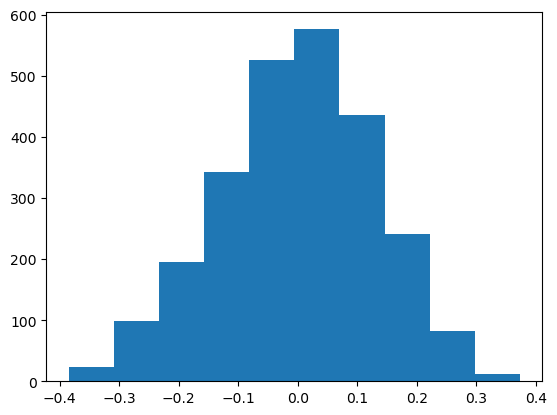

In [28]:
plt.hist(m2.resid)

/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


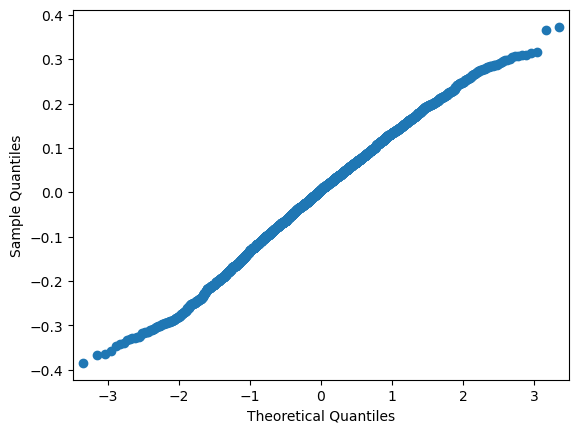

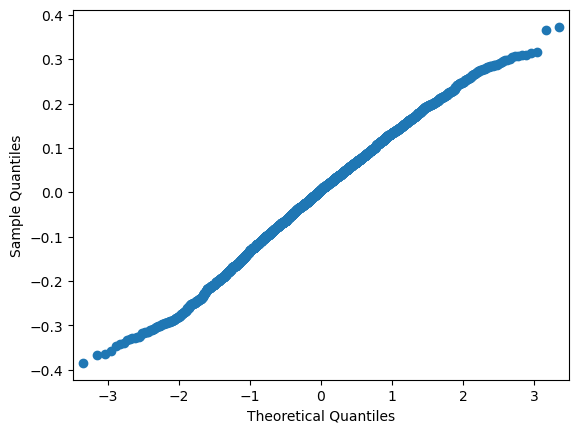

In [27]:
sm.qqplot(m2.resid)